In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import collections
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier # 앙상블 

from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score,classification_report,confusion_matrix  # ROC곡선 그리기
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV, cross_val_score  # 하이퍼파라미터 튜닝, 교차타당도

# 데이터 읽기

In [2]:
origin_df = pd.read_csv("../data/basline_data.csv",index_col=['Date'],parse_dates=True)

In [3]:
origin_df.head()

,Open,High,Low,Close,Adj Close,Volume,next_price,next_rtn,log_return,CCI,...,middle,lb,MTM1,MTM3,ROC,WPR,S&P500,SOX,VIX,KOSPI
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,7068.327148,7109.184570,6913.069336,7027.469727,6893.216309,2256630,6813.062500,-0.005780,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1188.050049,410.359985,13.98,886.900024
2005-01-05,6913.069336,6978.440918,6815.011230,6945.754883,6813.062500,1773241,6853.140137,0.004728,-0.011696,NaN,...,NaN,NaN,-81.714844,NaN,NaN,NaN,1183.739990,404.250000,14.09,885.190002
2005-01-06,6978.440918,7305.299805,6847.697266,6986.612305,6853.140137,7480900,7085.585449,0.001171,0.005865,NaN,...,NaN,NaN,40.857422,NaN,NaN,NaN,1187.890015,402.140015,13.58,871.280029
2005-01-07,7043.812500,7231.756836,7019.298340,7223.585449,7085.585449,4612385,7253.907715,0.025522,0.033356,NaN,...,NaN,NaN,236.973145,196.115723,NaN,NaN,1186.189941,407.559998,13.49,870.840027
2005-01-10,7313.471680,7599.473145,7313.471680,7395.186035,7253.907715,4720077,7334.061523,0.011173,0.023478,NaN,...,NaN,NaN,171.600586,449.431152,NaN,NaN,1190.250000,406.250000,13.23,874.179993


In [4]:
n_list = [1,3,5,7,10,20,30,60,90]
for n in n_list:
    col_name = 'next_price'+str(n)
    origin_df[col_name] = origin_df['Close'].shift(-n)
    diffs = origin_df[col_name]-origin_df['Close']
    label_name = 'label'+str(n)
    origin_df[label_name] = np.where(diffs>0,1,0)

In [5]:
origin_df.head(60)

,Open,High,Low,Close,Adj Close,Volume,next_price,next_rtn,log_return,CCI,...,next_price10,label10,next_price20,label20,next_price30,label30,next_price60,label60,next_price90,label90
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,7068.327148,7109.184570,6913.069336,7027.469727,6893.216309,2256630,6813.062500,-0.005780,NaN,NaN,...,8130.619141,1,7117.355957,1,7264.442383,1,7239.928223,1,8057.075684,1
2005-01-05,6913.069336,6978.440918,6815.011230,6945.754883,6813.062500,1773241,6853.140137,0.004728,-0.011696,NaN,...,7836.445801,1,7476.900879,1,7141.870605,1,7272.614258,1,8057.075684,1
2005-01-06,6978.440918,7305.299805,6847.697266,6986.612305,6853.140137,7480900,7085.585449,0.001171,0.005865,NaN,...,7517.758301,1,7501.415527,1,7068.327148,1,7190.899414,1,8048.904297,1
2005-01-07,7043.812500,7231.756836,7019.298340,7223.585449,7085.585449,4612385,7253.907715,0.025522,0.033356,NaN,...,7509.586914,1,7387.014648,1,6937.583496,0,7190.899414,0,7926.332031,1
2005-01-10,7313.471680,7599.473145,7313.471680,7395.186035,7253.907715,4720077,7334.061523,0.011173,0.023478,NaN,...,7436.043457,1,7452.386719,1,6798.668457,0,7444.214844,1,7901.817871,1
2005-01-11,7354.328613,7591.301758,7272.614258,7476.900879,7334.061523,3491413,7422.230957,0.016667,0.010989,NaN,...,7272.614258,0,7452.386719,0,7101.013184,0,7566.787109,1,8326.734375,1
2005-01-12,7517.758301,7746.559570,7485.072266,7566.787109,7422.230957,2796312,7374.139160,0.006522,0.011950,NaN,...,7509.586914,0,7248.099609,0,7068.327148,0,7501.415527,0,8302.219727,1
2005-01-13,7632.159180,7632.159180,7403.357910,7517.758301,7374.139160,1623941,7374.139160,-0.014989,-0.006501,NaN,...,7272.614258,0,7354.328613,0,7354.328613,0,7525.929688,1,8539.193359,1
2005-01-14,7444.214844,7534.101562,7403.357910,7517.758301,7374.139160,1182160,8015.368652,0.009879,0.000000,NaN,...,7125.527344,0,7387.014648,0,7354.328613,0,7574.958496,1,8580.050781,1


In [6]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4103 entries, 2005-01-04 to 2021-08-13
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4103 non-null   float64
 1   High          4103 non-null   float64
 2   Low           4103 non-null   float64
 3   Close         4103 non-null   float64
 4   Adj Close     4103 non-null   float64
 5   Volume        4103 non-null   int64  
 6   next_price    4102 non-null   float64
 7   next_rtn      4103 non-null   float64
 8   log_return    4102 non-null   float64
 9   CCI           4090 non-null   float64
 10  MA5           4099 non-null   float64
 11  MA10          4094 non-null   float64
 12  RASD5         4095 non-null   float64
 13  RASD10        4090 non-null   float64
 14  MACD          4070 non-null   float64
 15  ATR           4089 non-null   float64
 16  ub            4084 non-null   float64
 17  middle        4084 non-null   float64
 18  lb        

In [7]:
origin_df.describe()

,Open,High,Low,Close,Adj Close,Volume,next_price,next_rtn,log_return,CCI,...,next_price10,label10,next_price20,label20,next_price30,label30,next_price60,label60,next_price90,label90
count,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4.103000e+03,4102.000000,4103.000000,4102.000000,4090.000000,...,4093.000000,4103.000000,4083.000000,4103.000000,4073.000000,4103.000000,4043.000000,4103.000000,4013.000000,4103.000000
mean,105424.117193,106985.202228,103805.282740,105372.819948,104498.280468,9.247963e+05,104522.074974,-0.000018,0.001011,14.818123,...,105612.228429,0.561053,105852.605481,0.568852,106094.379552,0.579820,106828.739318,0.597368,107570.450197,0.631489
std,85302.295813,86455.934547,84114.425586,85248.941490,85264.226192,7.084774e+05,85260.995811,0.022315,0.026804,106.318725,...,85215.133825,0.496319,85180.705310,0.495297,85145.159915,0.493648,85030.998687,0.490488,84912.758855,0.482460
min,6692.439453,6888.554688,6635.238770,6635.238770,6508.479492,0.000000e+00,6508.479492,-0.148804,-0.378482,-344.272179,...,6635.238770,0.000000,6635.238770,0.000000,6635.238770,0.000000,6962.098145,0.000000,7901.817871,0.000000
25%,44371.117188,45106.550781,43513.113281,44371.117188,43523.449219,4.779300e+05,43523.449219,-0.013356,-0.013691,-68.673406,...,44469.175781,0.000000,44579.490234,0.000000,44616.261719,0.000000,45082.035156,0.000000,45351.695312,0.000000
50%,67782.398438,68885.546875,66434.101562,67782.398438,66779.921875,7.346400e+05,66790.000000,0.000000,0.000000,24.085423,...,67904.968750,1.000000,68027.539062,1.000000,68517.828125,1.000000,69743.554688,1.000000,70601.554688,1.000000
75%,151400.000000,153400.000000,149400.000000,151000.000000,149782.453125,1.129864e+06,149782.453125,0.012387,0.014310,94.431219,...,151000.000000,1.000000,151000.000000,1.000000,151200.000000,1.000000,151400.000000,1.000000,151600.000000,1.000000
max,460000.000000,465000.000000,452000.000000,452000.000000,452000.000000,1.010686e+07,452000.000000,0.187845,0.378485,466.666667,...,452000.000000,1.000000,452000.000000,1.000000,452000.000000,1.000000,452000.000000,1.000000,452000.000000,1.000000


# 초기 세팅

* 기간 : 2011.01.03~2020.12.31
* train /test 비율 : 8 : 2    -> val 만들 경우: 20% 
* shuffle = True
* random seed = 1234
* 변수 : baseline data 변수 다 사용 ( 추후에 성능이 가장 높은 조합으로 변경해 수정)
* 7일 30일 90일 
* null : df.dropna(inplace=True)
* min-max scaler

## 범위

In [8]:
df = origin_df['2011-01-01':'2020-12-31']

In [9]:
df.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
next_price       0
next_rtn         0
log_return       0
CCI              0
MA5              0
MA10             0
RASD5            0
RASD10           0
MACD             0
ATR              0
ub               0
middle           0
lb               0
MTM1             0
MTM3             0
ROC              0
WPR              0
S&P500          74
SOX             75
VIX             74
KOSPI            1
next_price1      0
label1           0
next_price3      0
label3           0
next_price5      0
label5           0
next_price7      0
label7           0
next_price10     0
label10          0
next_price20     0
label20          0
next_price30     0
label30          0
next_price60     0
label60          0
next_price90     0
label90          0
dtype: int64

## 결측치

In [10]:
df.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2011-01-03 to 2020-12-30
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2361 non-null   float64
 1   High          2361 non-null   float64
 2   Low           2361 non-null   float64
 3   Close         2361 non-null   float64
 4   Adj Close     2361 non-null   float64
 5   Volume        2361 non-null   int64  
 6   next_price    2361 non-null   float64
 7   next_rtn      2361 non-null   float64
 8   log_return    2361 non-null   float64
 9   CCI           2361 non-null   float64
 10  MA5           2361 non-null   float64
 11  MA10          2361 non-null   float64
 12  RASD5         2361 non-null   float64
 13  RASD10        2361 non-null   float64
 14  MACD          2361 non-null   float64
 15  ATR           2361 non-null   float64
 16  ub            2361 non-null   float64
 17  middle        2361 non-null   float64
 18  lb        

## 라벨링 시각화

In [12]:
ratio_list = []
total = len(df)
for n in n_list : 
    label_name = 'label'+str(n)
    ratio = round(df[label_name].sum() / total * 100)
    ratio_list.append(ratio)

In [13]:
ratio_list

[48, 51, 51, 53, 55, 56, 56, 58, 61]

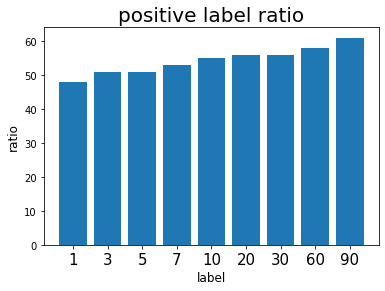

In [14]:
index = np.arange(len(n_list))
plt.bar(index, ratio_list)
plt.title('positive label ratio',fontsize=20)
plt.xlabel('label', fontsize=12)
plt.ylabel('ratio',fontsize=12)
plt.xticks(index,n_list, fontsize=15)
plt.show()

# Prediction

In [15]:
feature1_list = ['Open','High','Low','Adj Close','Volume','log_return','Close','next_rtn']
feature2_list = ['RASD5','RASD10','ub','lb','CCI','ATR','MACD','MA5','MA10','MTM1','MTM3','ROC','WPR','middle']
feature3_list = ['S&P500', 'SOX', 'VIX','KOSPI']
feature4_list = ['next_price']
all_x_feature = feature1_list+feature2_list+feature3_list

## trn 7 tst 3

In [16]:
y_test_list = []
y_pred_list = []

if set(df.columns[:27]) == set(all_x_feature + feature4_list):
    X = df[all_x_feature]
    
    # Min Max Scaler를 사용해 스케일링
    scaler = MinMaxScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    
    for n in n_list:
        label_name = 'label'+str(n)
        y = df[label_name]

        # train test split
        # label별로 비교하기위해 startify x
        X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=1234)
        print('Lable'+str(n)+' 양성비율','train : %.3f' %(sum(y_train)/len(y_train)),end=' ')
        print('test : %.3f' %(sum(y_test)/len(y_test)),end='\t')
        
        y_test_list.append(y_test)
        
        forest = RandomForestClassifier(criterion='entropy',n_estimators=700,random_state=1)
        forest.fit(X_train,y_train)
        y_pred = forest.predict(X_test)
        
        y_pred_list.append(y_pred)

        print(label_name,'정확도: %.3f' % accuracy_score(y_test, y_pred))

Lable1 양성비율 train : 0.482 test : 0.475	label1 정확도: 0.516
Lable3 양성비율 train : 0.506 test : 0.512	label3 정확도: 0.667
Lable5 양성비율 train : 0.514 test : 0.498	label5 정확도: 0.735
Lable7 양성비율 train : 0.532 test : 0.509	label7 정확도: 0.798
Lable10 양성비율 train : 0.551 test : 0.543	label10 정확도: 0.855
Lable20 양성비율 train : 0.569 test : 0.523	label20 정확도: 0.877
Lable30 양성비율 train : 0.563 test : 0.556	label30 정확도: 0.897
Lable60 양성비율 train : 0.571 test : 0.594	label60 정확도: 0.928
Lable90 양성비율 train : 0.613 test : 0.618	label90 정확도: 0.934


## trn 8 tst 2

In [62]:
y_test_list = []
y_pred_list = []

if set(df.columns[:27]) == set(all_x_feature + feature4_list):
    X = df[all_x_feature]
    
    # Min Max Scaler를 사용해 스케일링
    scaler = MinMaxScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    
    for n in n_list:
        label_name = 'label'+str(n)
        y = df[label_name]

        # train test split
        # label별로 비교하기위해 startify x
        X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=1234)
        print('Lable'+str(n)+' 양성비율','train : %.3f' %(sum(y_train)/len(y_train)),end=' ')
        print('test : %.3f' %(sum(y_test)/len(y_test)),end='\t')
        
        y_test_list.append(y_test)
        
        forest = RandomForestClassifier(criterion='entropy',n_estimators=700,random_state=1)
        forest.fit(X_train,y_train)
        y_pred = forest.predict(X_test)
        
        y_pred_list.append(y_pred)

        print(label_name,'정확도: %.3f' % accuracy_score(y_test, y_pred))

Lable1 양성비율 train : 0.478 test : 0.488	label1 정확도: 0.535
Lable3 양성비율 train : 0.509 test : 0.503	label3 정확도: 0.679
Lable5 양성비율 train : 0.514 test : 0.488	label5 정확도: 0.746
Lable7 양성비율 train : 0.531 test : 0.503	label7 정확도: 0.814
Lable10 양성비율 train : 0.553 test : 0.533	label10 정확도: 0.844
Lable20 양성비율 train : 0.567 test : 0.507	label20 정확도: 0.894
Lable30 양성비율 train : 0.572 test : 0.518	label30 정확도: 0.896
Lable60 양성비율 train : 0.578 test : 0.577	label60 정확도: 0.941
Lable90 양성비율 train : 0.613 test : 0.617	label90 정확도: 0.943


In [17]:
X.columns

Index(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'log_return', 'Close',
       'next_rtn', 'RASD5', 'RASD10', 'ub', 'lb', 'CCI', 'ATR', 'MACD', 'MA5',
       'MA10', 'MTM1', 'MTM3', 'ROC', 'WPR', 'middle', 'S&P500', 'SOX', 'VIX',
       'KOSPI'],
      dtype='object')

# tree 시각화

## 90일 후

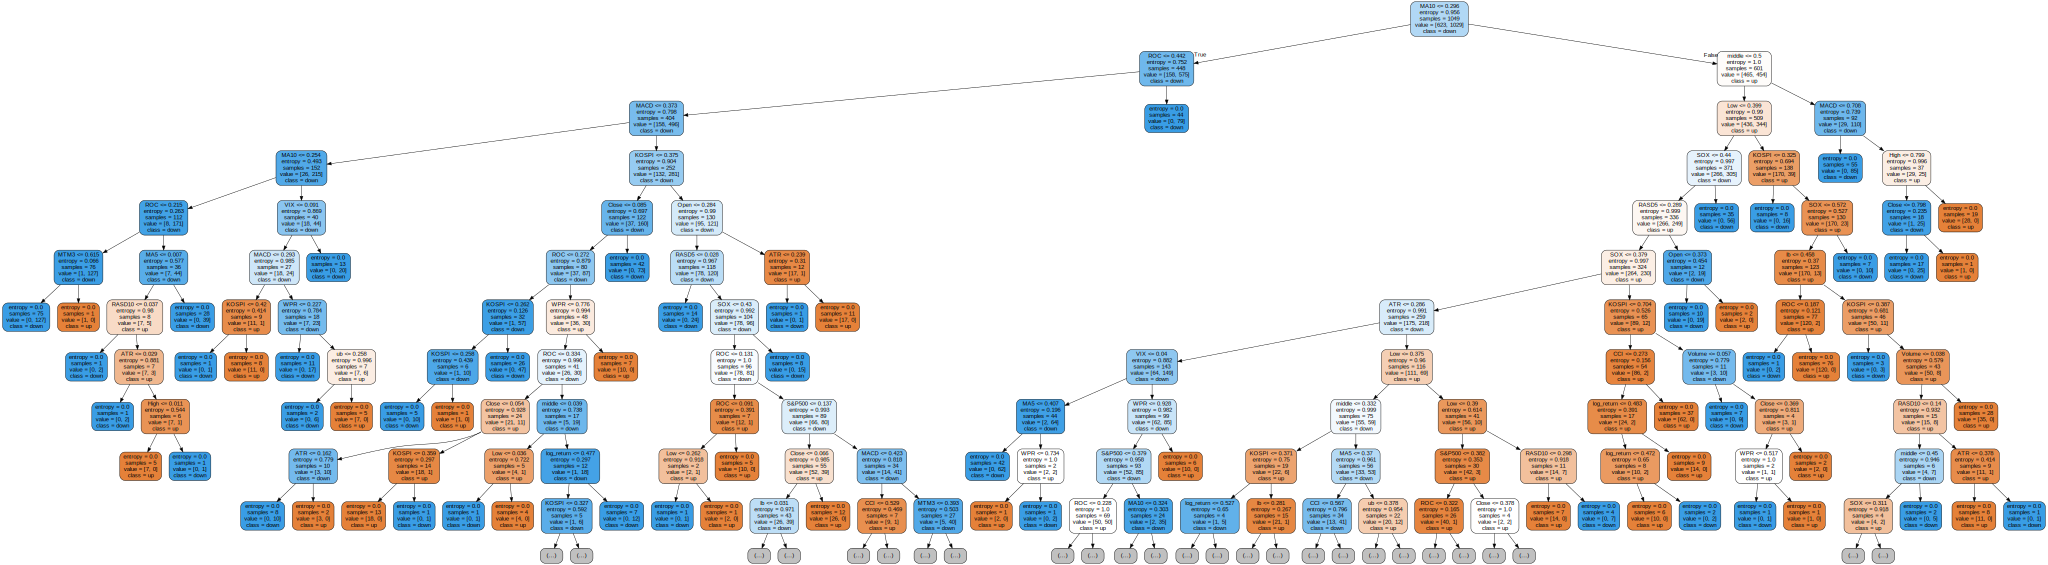

'tree.png.pdf'

In [18]:
from sklearn.tree import export_graphviz
import graphviz 
# 마지막 90일 후 예측  tree 모델 시각화
estimator = forest.estimators_[10]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = ['up','down'],
                max_depth = 10, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

with open('tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
display(dot)
dot.render(filename='tree.png')

# 해석을 위한 데이터 프레임

In [19]:
final_df = pd.DataFrame(y_test_list[0])

for i,n in enumerate(n_list):
    if i != 0 :
        y = pd.DataFrame(y_test_list[i])
        final_df = final_df.join(y, how='outer')
    col_name = 'pred' + str(n)
    pred = pd.DataFrame(y_pred_list[i],index=final_df.index,columns=[col_name])
    final_df = final_df.join(pred, how='outer')



In [20]:
final_df.head()

,label1,pred1,label3,pred3,label5,pred5,label7,pred7,label10,pred10,label20,pred20,label30,pred30,label60,pred60,label90,pred90
Date,,,,,,,,,,,,,,,,,,
2020-11-20,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
2020-09-22,1,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,1
2018-05-21,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
2017-02-16,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2011-02-16,1,1,0,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1


In [21]:
#final_df.to_csv('../data/해석데이터.csv')

# 오류 확인

In [22]:
X = df[all_x_feature]
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

y = df['label1']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled,y, test_size=0.2, random_state=1234)
y = df['label3']
X_train3, X_test3, y_train3, y_test3= train_test_split(X_scaled,y, test_size=0.2, random_state=1234)
y = df['label5']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_scaled,y, test_size=0.2, random_state=1234)
y = df['label7']
X_train7, X_test7, y_train7, y_test7= train_test_split(X_scaled,y, test_size=0.2, random_state=1234)
y = df['label10']
X_train10, X_test10, y_train10, y_test10= train_test_split(X_scaled,y, test_size=0.2, random_state=1234)
y = df['label20']
X_train20, X_test20, y_train20, y_test20= train_test_split(X_scaled,y, test_size=0.2, random_state=1234)
y = df['label30']
X_train30, X_test30, y_train30, y_test30= train_test_split(X_scaled,y, test_size=0.2, random_state=1234)
y = df['label60']
X_train60, X_test60, y_train60, y_test60= train_test_split(X_scaled,y, test_size=0.2, random_state=1234)
y=df['label90']
X_train90, X_test90, y_train90, y_test90= train_test_split(X_scaled,y, test_size=0.2, random_state=1234)

In [23]:
len(set(y_test1.index) & set(y_test3.index) & set(y_test60.index) & set(y_test7.index) & set(y_test10.index) & set(y_test20.index) & set(y_test30.index) & set(y_test90.index))

473

In [24]:
y_test1.shape

(473,)

# 결과 해석

In [25]:
#label_df = df[['label1','label3','label5','label7','label10','label20','label30','label60','label90']]
#label_df.to_csv('../data/전체라벨데이터.csv')

In [26]:
label_df = pd.read_csv('../data/전체라벨데이터.csv',index_col=['Date'],parse_dates=True)

In [27]:
label_df.head()

,label1,label3,label5,label7,label10,label20,label30,label60,label90
Date,,,,,,,,,
2011-01-03,0,0,0,0,0,0,0,0,0
2011-01-04,1,1,0,0,0,0,0,0,0
2011-01-05,0,0,0,0,0,0,0,0,0
2011-01-06,1,0,0,0,0,0,0,0,0
2011-01-07,0,0,0,0,0,0,0,0,0


In [28]:
df1 = pd.read_csv('../data/해석데이터.csv',index_col=['Date'],parse_dates=True)

In [29]:
n_list = [1,3,5,7,10,20,30,60,90]

In [30]:
df1.head()

,label1,pred1,label3,pred3,label5,pred5,label7,pred7,label10,pred10,label20,pred20,label30,pred30,label60,pred60,label90,pred90
Date,,,,,,,,,,,,,,,,,,
2020-11-20,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
2020-09-22,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,1
2018-05-21,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
2017-02-16,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2011-02-16,1,1,0,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1


In [31]:
df1.shape

(473, 18)

# 예측기간을 늘릴때 label이 달라지는 비율 시각화

In [32]:
ratio_list = []
for n1 in n_list:
    label_name1 = 'label'+str(n1)
    ratios = []
    for n2 in n_list:

        label_name2 = 'label'+str(n2)
        ratio = round(sum(label_df[label_name1]!=label_df[label_name2])/label_df.shape[0],2)
        ratios.append(ratio)
    ratio_list.append(ratios)

In [33]:
ratio_df = pd.DataFrame(ratio_list,index=n_list,columns=n_list)
ratio_df

,1,3,5,7,10,20,30,60,90
1,0.00,0.32,0.37,0.39,0.42,0.44,0.46,0.48,0.48
3,0.32,0.00,0.24,0.30,0.34,0.39,0.41,0.44,0.45
5,0.37,0.24,0.00,0.19,0.25,0.34,0.36,0.42,0.43
7,0.39,0.30,0.19,0.00,0.19,0.30,0.33,0.40,0.42
10,0.42,0.34,0.25,0.19,0.00,0.25,0.28,0.38,0.40
20,0.44,0.39,0.34,0.30,0.25,0.00,0.20,0.32,0.36
30,0.46,0.41,0.36,0.33,0.28,0.20,0.00,0.25,0.31
60,0.48,0.44,0.42,0.40,0.38,0.32,0.25,0.00,0.19
90,0.48,0.45,0.43,0.42,0.40,0.36,0.31,0.19,0.00


## label 1 to N

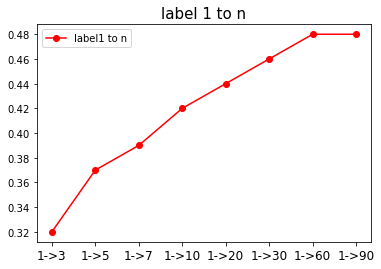

In [34]:
index= range(8)
labels = ['1->3','1->5','1->7','1->10','1->20','1->30','1->60','1->90']
plt.plot(index,ratio_df.loc[1,3:].values, color='r',  marker='o')
plt.xticks(index, labels,fontsize=12)
plt.legend(['label1 to n'])
plt.title('label 1 to n',fontsize=15)
plt.show()

## heatmap

In [35]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


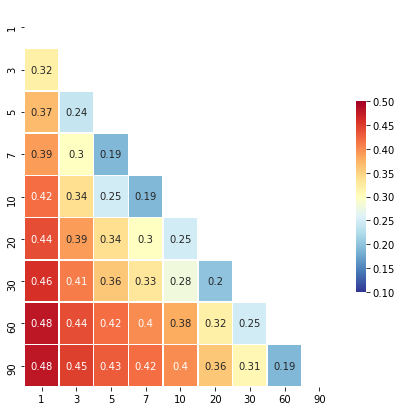

In [36]:
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(ratio_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(ratio_df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = 0.1,vmax = 0.5   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

## 어떤 기간에 주로 라벨이 달라졌을까?

<AxesSubplot:xlabel='Date'>

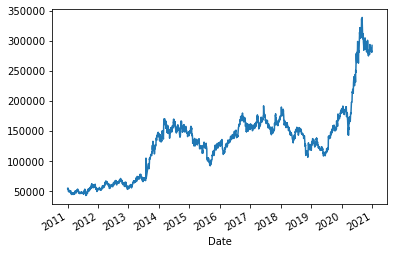

In [37]:
df['Close'].plot()

In [38]:
label1to3 = label_df['label1'][label_df['label1']!=label_df['label3']]
label1to7 = label_df['label1'][label_df['label1']!=label_df['label7']]
label1to30 =  label_df['label1'][label_df['label1']!=label_df['label30']]
label1to90 =  label_df['label1'][label_df['label1']!=label_df['label90']]

In [39]:
df1['label1'][df1['label1']!=df1['label3']].index

DatetimeIndex(['2020-11-20', '2011-02-16', '2011-06-27', '2015-06-25',
               '2014-09-26', '2011-04-20', '2015-06-19', '2011-11-04',
               '2015-02-25', '2020-06-23',
               ...
               '2018-08-29', '2018-10-19', '2019-08-22', '2014-03-28',
               '2016-04-22', '2012-06-19', '2012-02-03', '2017-08-17',
               '2019-04-29', '2018-08-31'],
              dtype='datetime64[ns]', name='Date', length=161, freq=None)

In [40]:
label1to3.resample(rule='Y').sum()

Date
2011-12-31    43
2012-12-31    40
2013-12-31    25
2014-12-31    39
2015-12-31    34
2016-12-31    33
2017-12-31    33
2018-12-31    36
2019-12-31    36
2020-12-31    29
Freq: A-DEC, Name: label1, dtype: int64

In [41]:
label1to7.resample(rule='Y').sum()

Date
2011-12-31    52
2012-12-31    37
2013-12-31    26
2014-12-31    52
2015-12-31    45
2016-12-31    41
2017-12-31    32
2018-12-31    50
2019-12-31    35
2020-12-31    36
Freq: A-DEC, Name: label1, dtype: int64

In [42]:
label1to30.resample(rule='Y').sum()

Date
2011-12-31    53
2012-12-31    44
2013-12-31    16
2014-12-31    60
2015-12-31    52
2016-12-31    37
2017-12-31    44
2018-12-31    65
2019-12-31    29
2020-12-31    45
Freq: A-DEC, Name: label1, dtype: int64

In [43]:
label1to90.resample(rule='Y').sum()

Date
2011-12-31    35
2012-12-31    30
2013-12-31     1
2014-12-31    70
2015-12-31    55
2016-12-31    32
2017-12-31    52
2018-12-31    84
2019-12-31    29
2020-12-31    20
Freq: A-DEC, Name: label1, dtype: int64

# 예측이 달라지는 비율 시각화

In [44]:
def visualize_change(start=1,end=3,change=True):
    col1 = 'label'+str(start)
    col2 = 'label'+str(end)
    col3 = str(start)+'->'+str(end)
    
    if change:
        idx = df1['label1'][df1[col1]!=df1[col2]].index
    else:
        idx = df1['label1'][df1[col1]==df1[col2]].index
        
    for n in n_list:
        label_name = 'label'+str(n)
        pred_name = 'pred'+str(n)
        col_name = 'TF'+str(n)

        df1[col_name] = (df1[label_name]==df1[pred_name])

    TF_df = df1[['TF1', 'TF3', 'TF5', 'TF7',
           'TF10', 'TF20', 'TF30', 'TF60', 'TF90']]
    for tf in TF_df.columns:
        TF_df[tf]=np.where(TF_df[tf]==1,'C','I')

    new_col_list=[] 
    for n in n_list[1:]:
        col_name = 'TF'+str(n)
        new_col = '1->'+str(n)
        new_col_list.append(new_col)
        TF_df[new_col] = TF_df['TF1'] + '-' + TF_df[col_name]
        
    return TF_df.loc[idx,col3].value_counts()

## Change

In [45]:
data_list = []
for n in n_list[1:]:
    data = visualize_change(start=1,end=n,change=True)
    data_list.append(data)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [46]:
change =pd.DataFrame(data_list)
change.head()

,I-C,C-I,C-C,I-I
1->3,73,36,27,25
1->5,88,31,48,17
1->7,88,21,56,10
1->10,87,9,67,12
1->20,97,14,80,10


In [47]:
change['I-C'].values

array([ 73,  88,  88,  87,  97, 103,  97, 100], dtype=int64)

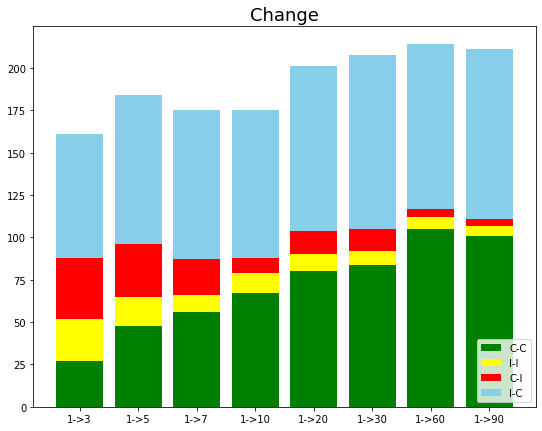

In [48]:
data1=change['I-C'].values
data2=change['C-I'].values
data3=change['I-I'].values
data4=change['C-C'].values

index=change.index

plt.figure(figsize=(9,7))
plt.bar(index,data4,color="green",label='C-C')
plt.bar(index,data3,color="yellow",bottom=np.array(data4),label='I-I')
plt.bar(index,data2,color="red",bottom=np.array(data4)+np.array(data3),label='C-I')
plt.bar(index,data1,color="skyblue",bottom=np.array(data4)+np.array(data3)+np.array(data2),label='I-C')
plt.title("Change",fontsize=18)
plt.legend(loc="lower right")
plt.show()

예측값이 바뀌어서 정답으로 변한 벡터 (I-C)의 비중이 점점 증가함. 또한 예측값이 바뀌어도 여전히 정답인 벡터들이 증가한다.일부 학습 데이터 벡터들의 레이블 전환으로 인해 학습 모델이 영향을 받아 R.win의 증가 전에는 맞게 예측하지 못했던 테스트 데이터 벡터들을 맞게 예측하게 된 것.

## NoChange

In [49]:
data_list2 = []
for n in n_list[1:]:
    data = visualize_change(start=1,end=n,change=False)
    data_list2.append(data)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [50]:
Nochange =pd.DataFrame(data_list2)
Nochange.head()

,C-C,I-C,I-I,C-I
1->3,151,70,52,39
1->5,145,72,43,29
1->7,154,87,35,22
1->10,153,92,29,24
1->20,147,99,14,12


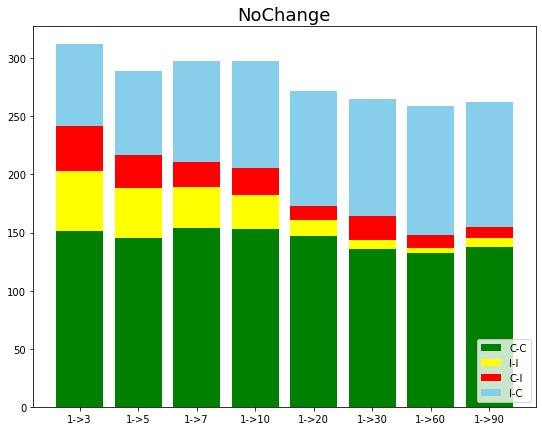

In [51]:
data1=Nochange['I-C'].values
data2=Nochange['C-I'].values
data3=Nochange['I-I'].values
data4=Nochange['C-C'].values

index=change.index

plt.figure(figsize=(9,7))
plt.bar(index,data4,color="green",label='C-C')
plt.bar(index,data3,color="yellow",bottom=np.array(data4),label='I-I')
plt.bar(index,data2,color="red",bottom=np.array(data4)+np.array(data3),label='C-I')
plt.bar(index,data1,color="skyblue",bottom=np.array(data4)+np.array(data3)+np.array(data2),label='I-C')
plt.title("NoChange",fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Nochange + Change

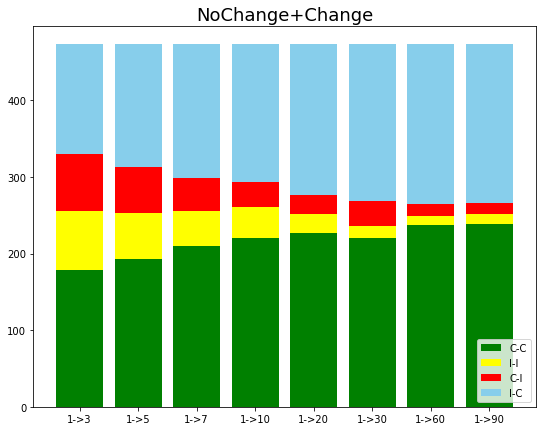

In [52]:
all_data = change + Nochange
data1=all_data['I-C'].values
data2=all_data['C-I'].values
data3=all_data['I-I'].values
data4=all_data['C-C'].values

index=change.index

plt.figure(figsize=(9,7))
plt.bar(index,data4,color="green",label='C-C')
plt.bar(index,data3,color="yellow",bottom=np.array(data4),label='I-I')
plt.bar(index,data2,color="red",bottom=np.array(data4)+np.array(data3),label='C-I')
plt.bar(index,data1,color="skyblue",bottom=np.array(data4)+np.array(data3)+np.array(data2),label='I-C')
plt.title("NoChange+Change",fontsize=18)
plt.legend(loc="lower right")
plt.show()

* 오류 확인

In [53]:
Nochange.loc['1->3',:].sum() + change.loc['1->3',:].sum() == df1.shape[0]

True

# 상승-하락 비율 시각화

In [56]:
ud_list = []
for n in n_list:
    label_name = 'label'+str(n)
    col_name = 'UD'+str(n)
    
    label_df[col_name] = np.where(label_df[label_name]==1,'U','D')
    if n != 1:
        col_name1 = '1->'+str(n)
        ud_list.append(col_name1)
        label_df[col_name1] = label_df['UD1']+'-'+ label_df[col_name]


In [59]:
def visualize_udchange(label_df):
    data_list = []
    for n in n_list[1:]:
        label_name = '1->'+str(n)
        data = label_df[label_name].value_counts()
        data_list.append(data)
    return pd.DataFrame(data_list)

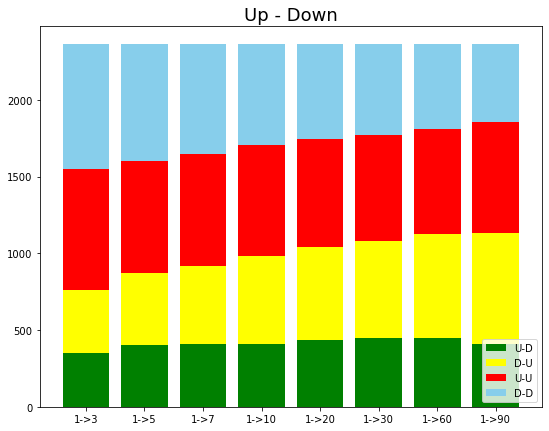

In [61]:
all_data = visualize_udchange(label_df)
data1=all_data['D-D'].values
data2=all_data['U-U'].values
data3=all_data['D-U'].values
data4=all_data['U-D'].values

index=change.index

plt.figure(figsize=(9,7))
plt.bar(index,data4,color="green",label='U-D')
plt.bar(index,data3,color="yellow",bottom=np.array(data4),label='D-U')
plt.bar(index,data2,color="red",bottom=np.array(data4)+np.array(data3),label='U-U')
plt.bar(index,data1,color="skyblue",bottom=np.array(data4)+np.array(data3)+np.array(data2),label='D-D')
plt.title("Up - Down",fontsize=18)
plt.legend(loc="lower right")
plt.show()